<a href="https://colab.research.google.com/github/asilbek-data-scientist/2_modul/blob/main/5_modul_ML_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification

K-NN

Ko'krak saratonini aniqlash

In [18]:
import pandas as pd
import numpy as np

In [19]:
url = 'https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv'
df = pd.read_csv(url)
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
462,9113156,B,14.40,26.99,92.25,646.1,0.06995,0.05223,0.034760,0.017370,...,15.40,31.98,100.40,734.6,0.10170,0.14600,0.147200,0.05563,0.2345,0.06464
346,898678,B,12.06,18.90,76.66,445.3,0.08386,0.05794,0.007510,0.008488,...,13.64,27.06,86.54,562.6,0.12890,0.13520,0.045060,0.05093,0.2880,0.08083
189,874839,B,12.30,15.90,78.83,463.7,0.08080,0.07253,0.038440,0.016540,...,13.35,19.59,86.65,546.7,0.10960,0.16500,0.142300,0.04815,0.2482,0.06306
426,907409,B,10.48,14.98,67.49,333.6,0.09816,0.10130,0.063350,0.022180,...,12.13,21.57,81.41,440.4,0.13270,0.29960,0.293900,0.09310,0.3020,0.09646
199,877500,M,14.45,20.22,94.49,642.7,0.09872,0.12060,0.118000,0.059800,...,18.33,30.12,117.90,1044.0,0.15520,0.40560,0.496700,0.18380,0.4753,0.10130
254,886226,M,19.45,19.33,126.50,1169.0,0.10350,0.11880,0.137900,0.085910,...,25.70,24.57,163.10,1972.0,0.14970,0.31610,0.431700,0.19990,0.3379,0.08950
360,901034302,B,12.54,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,...,13.72,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.01635,0.2233,0.05521
288,8913049,B,11.26,19.96,73.72,394.1,0.08020,0.11810,0.092740,0.055880,...,11.86,22.33,78.27,437.6,0.10280,0.18430,0.154600,0.09314,0.2955,0.07009
210,881046502,M,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.164000,0.095610,...,23.24,27.84,158.30,1656.0,0.11780,0.29200,0.386100,0.19200,0.2909,0.05865
305,893061,B,11.60,24.49,74.23,417.2,0.07474,0.05688,0.019740,0.013130,...,12.44,31.62,81.39,476.5,0.09545,0.13610,0.072390,0.04815,0.3244,0.06745


Dataset ko'krakdagi o'simtalar haqida ma'lumotlarni jamlagan. diagnosis ustuni esa o'simta rak (M - malignant) yoki rak emas (B - benign) anglatadi.

In [20]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Keling bu qiymatlarni 0 va 1 ga o'zgartiramiz. M -> 1, B -> 0
Buning uchun yoki sklearn tarkibidagi LabelEncoder dan yoki pandas dagi .replace() metodidan foydalanish mumkin.

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'].values)
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [22]:
# df['diagnosis'] = df['diagnosis'].replace("M", 1)
# df['diagnosis'] = df['diagnosis'].replace("B", 0)
# df['diagnosis'].values_counts()

ID ustunini tashlab yuboramiz

In [23]:
df.drop(columns=['id'], inplace=True)

In [25]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [26]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

# ML gaa tayyorlaymiz

In [27]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis']

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# ML

In [31]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # k=ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
y_predict = knn.predict(X_test)

# Baholash

## Jaccard index

In [35]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predict)

0.8958333333333334

# Confusion matrix

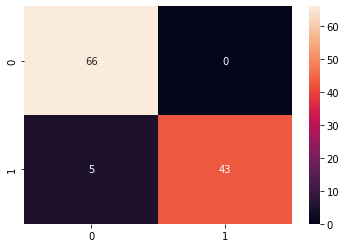

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [37]:
confusion_matrix(y_test, y_predict)

array([[66,  0],
       [ 5, 43]])

# Precision, recall, F1

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{accuracy=}\n{f1=}")

precision=1.0
recall=0.8958333333333334
accuracy=0.956140350877193
f1=0.945054945054945


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        66
           1       1.00      0.90      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Cross-validation yordamida tekshiramiz

In [43]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       357
           1       0.97      0.93      0.95       212

    accuracy                           0.96       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



# Eng yaxshi k ni topish

for yordamida

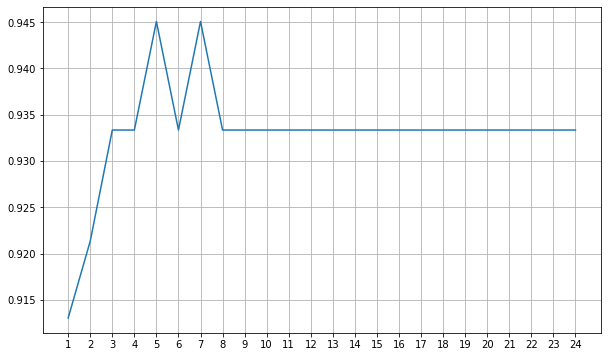

In [44]:
f1 = []
for k in range(1, 25):
  knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
  knn.fit(X_train, y_train)
  y_predict = knn.predict(X_test)
  f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), f1)
plt.xticks(range(1, 25))
plt.grid()
plt.show()

# Grid Search yordamida

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [51]:
knn_gscv.cv_results_['rank_test_score']

array([24, 21, 15, 10,  7,  3,  2,  4,  1,  4,  8,  8,  4, 11, 11, 13, 14,
       18, 18, 18, 22, 22, 16, 16], dtype=int32)

In [54]:
knn_gscv.best_params_

{'n_neighbors': 9}

In [52]:
knn_gscv.best_score_

0.968390001552554

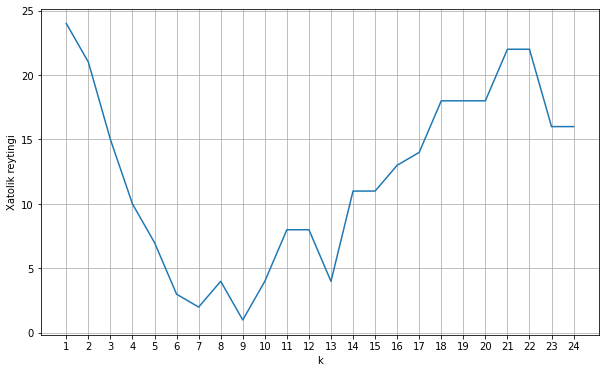

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel('k')
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()